In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [55]:
delivery=pd.read_csv("delivery_time.csv")
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [56]:
#normality test

In [57]:
delivery.shape

(21, 2)

In [58]:
delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [59]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [60]:
delivery.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

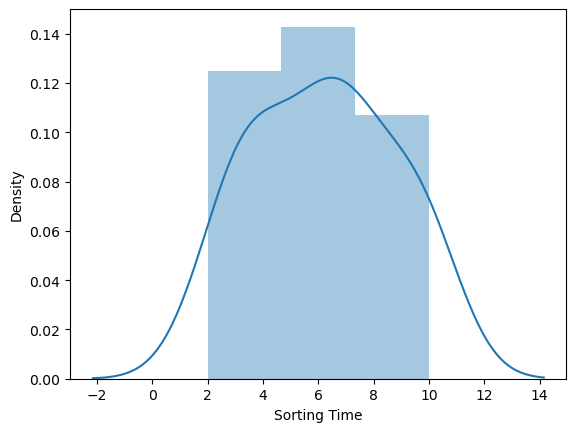

In [61]:
sns.distplot(delivery["Sorting Time"])
plt.show()

In [62]:
delivery.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

In [63]:
delivery.kurtosis()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

In [64]:
#2linearity test


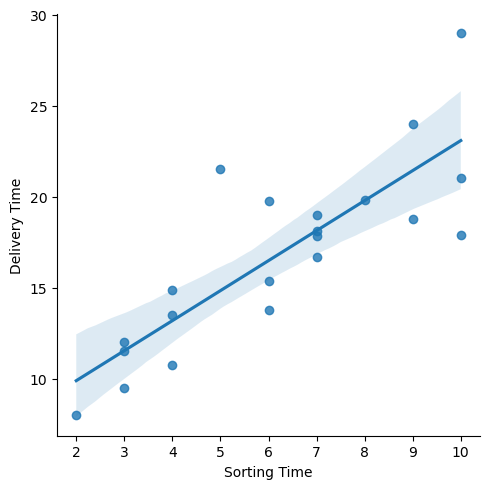

In [65]:
sns.lmplot(x="Sorting Time",y="Delivery Time",data=delivery)
plt.show()

In [66]:
#model building

In [67]:
Delivery1=delivery.rename({"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"},axis=1)
Delivery1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [68]:
linear_model=smf.ols("Delivery_Time~Sorting_Time",data=Delivery1)



In [69]:
linear_model=linear_model.fit()

In [70]:
linear_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [74]:
delivery=pd.DataFrame({"Sorting_Time":[3,5]})
delivery

,Sorting_Time
0,3
1,5


In [75]:
linear_model.predict(delivery)

0    11.529794
1    14.827833
dtype: float64

In [23]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           3.98e-06
Time:                        11:08:49   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
linear_model.rsquared

0.6822714748417231

# LOG TRANSFORMATION

In [25]:
Delivery1['log_sorting_time']=np.log(Delivery1['Sorting_Time'])
Delivery1


,Delivery_Time,Sorting_Time,log_sorting_time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585
5,15.35,6,1.791759
6,19.00,7,1.945910
7,9.50,3,1.098612
8,17.90,10,2.302585
9,18.75,9,2.197225


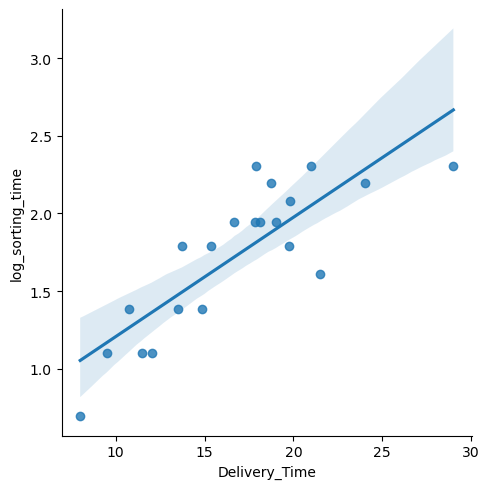

In [26]:
sns.lmplot(x="Delivery_Time",y="log_sorting_time",data=Delivery1)
plt.show()

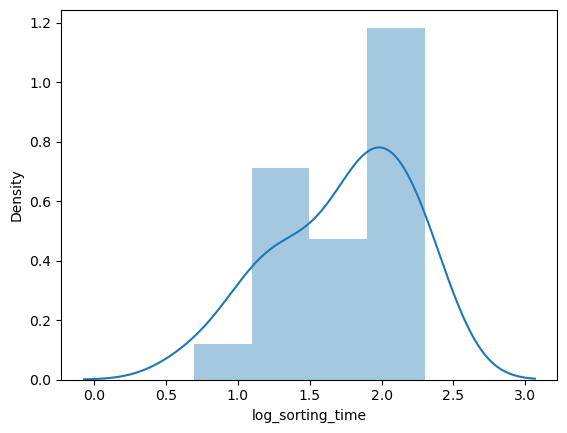

In [27]:
sns.distplot(Delivery1["log_sorting_time"])
plt.show()

In [28]:
logmodel=smf.ols("Delivery_Time~log_sorting_time",data=Delivery1)

In [29]:
logmodel=logmodel.fit()

In [30]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           2.64e-06
Time:                        11:08:51   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
logmodel.rsquared

0.6954434611324223

# sqrt Transformation

In [33]:
Delivery1['sqrt_sorting_time']=np.sqrt(Delivery1['Sorting_Time'])
Delivery1


,Delivery_Time,Sorting_Time,log_sorting_time,sqrt_sorting_time
0,21.00,10,2.302585,3.162278
1,13.50,4,1.386294,2.000000
2,19.75,6,1.791759,2.449490
3,24.00,9,2.197225,3.000000
4,29.00,10,2.302585,3.162278
5,15.35,6,1.791759,2.449490
6,19.00,7,1.945910,2.645751
7,9.50,3,1.098612,1.732051
8,17.90,10,2.302585,3.162278
9,18.75,9,2.197225,3.000000


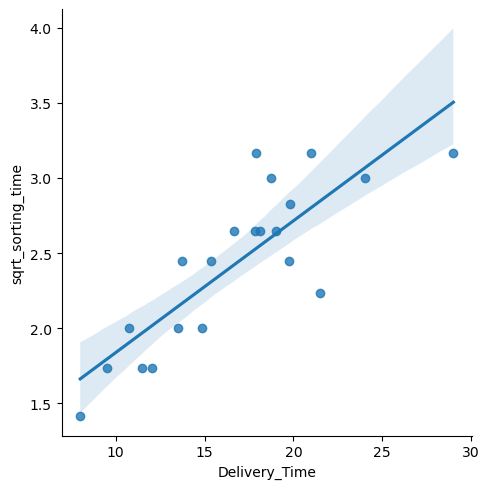

In [36]:
sns.lmplot(x="Delivery_Time",y='sqrt_sorting_time',data=Delivery1)
plt.show()

In [37]:
sqrtmodel=smf.ols(formula="Delivery_Time~sqrt_sorting_time",data=Delivery1)

In [38]:
sqrtmodel=sqrtmodel.fit()

In [39]:
sqrtmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           2.61e-06
Time:                        11:13:52   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5188      2.995     -0.841      0.411      -8.788       3.751
sqrt_sorting_time     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
sqrtmodel.rsquared

0.6958062276308671

### FROM COMPARING ABOVE MODELS ,SQRT MODEL GIVES MORE R SQUARE VALUE ,SO WE CHOOSE SQRT MODEL AS BEST ONE